In [1]:
import tensorflow as tf

In [2]:
# Define dataset paths
training_set = r'C:\Users\padsa\tirth\dog vs cat\dataset\training_set'
test_set = r'C:\Users\padsa\tirth\dog vs cat\dataset\test_set'

# Image augmentation for training data
train_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,  
    rotation_range=40,    
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],  
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
)

# Set parameters
target_size = (64, 64)
batch_size = 32

# Load training data
training_data = train_data_generator.flow_from_directory(
    training_set,  
    target_size=target_size,  
    batch_size=batch_size,
    shuffle=True,  
    subset='training',       
    class_mode='binary'
)

# Load validation data
validation_data = train_data_generator.flow_from_directory(
    training_set,  
    target_size=target_size,  
    batch_size=batch_size,
    shuffle=True,  
    subset='validation',  
    class_mode='binary'
)

# ImageDataGenerator for test data (no augmentation)
test_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_data = test_data_generator.flow_from_directory(
    test_set,  
    target_size=target_size,  
    batch_size=batch_size,
    shuffle=False,  
    class_mode='binary'
)

print("Data loaded successfully!")


Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Data loaded successfully!


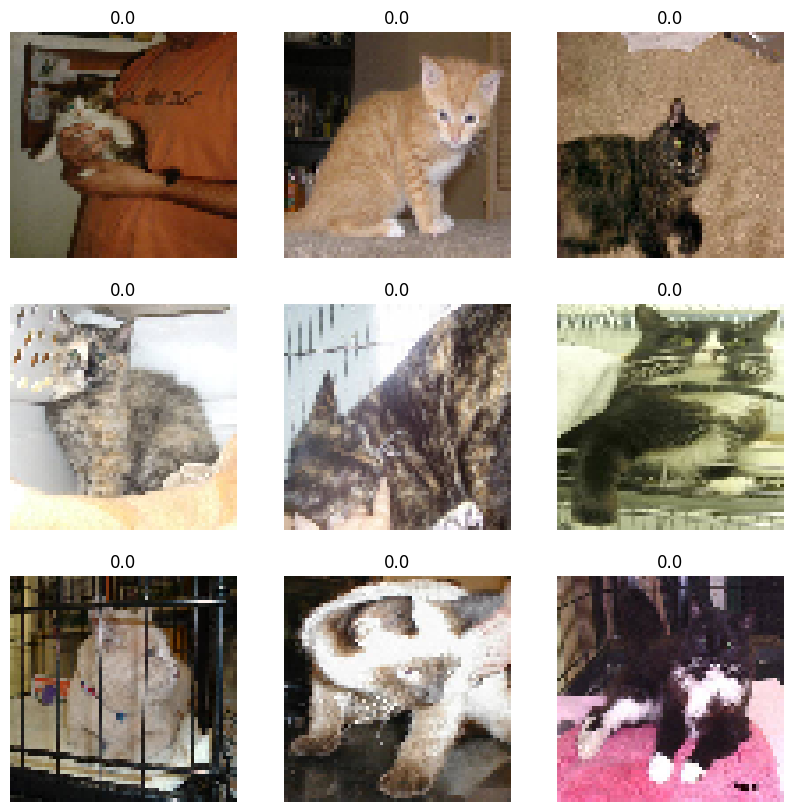

In [3]:
import matplotlib.pyplot as plt
images , label = next(iter(test_data))

plt.figure(figsize=(10,10))

for i in range(1,10):
    plt.subplot(3,3 ,i)
    plt.imshow(images[i])
    plt.title(f'{label[i]}')
    plt.axis('off')
plt.show()

In [4]:
CNN= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( filters=64 , kernel_size=3 , activation='relu' , input_shape = (64, 64, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2) , strides=2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( filters=128 , kernel_size=3 , activation='relu' ),
    tf.keras.layers.MaxPool2D(pool_size=(2,2) , strides=2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D( filters=256 , kernel_size=3 , activation='relu' ),
    tf.keras.layers.MaxPool2D(pool_size=(2,2) , strides=2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(activation='relu' , units=256),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(activation='relu' , units=128),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(activation='sigmoid' , units=1)
])

c:\Users\padsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
CNN.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])
CNN.fit(x=training_data , validation_data=validation_data , epochs=25 , verbose=2   )

c:\Users\padsa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
200/200 - 81s - 404ms/step - accuracy: 0.5298 - loss: 1.8317 - val_accuracy: 0.4988 - val_loss: 0.7199
Epoch 2/25
200/200 - 79s - 396ms/step - accuracy: 0.5361 - loss: 0.8232 - val_accuracy: 0.5344 - val_loss: 0.6905
Epoch 3/25
200/200 - 73s - 363ms/step - accuracy: 0.5427 - loss: 0.7119 - val_accuracy: 0.5675 - val_loss: 0.6806
Epoch 4/25
200/200 - 75s - 376ms/step - accuracy: 0.5683 - loss: 0.6922 - val_accuracy: 0.5900 - val_loss: 0.6721
Epoch 5/25
200/200 - 72s - 359ms/step - accuracy: 0.5759 - loss: 0.6848 - val_accuracy: 0.5881 - val_loss: 0.6681
Epoch 6/25
200/200 - 72s - 362ms/step - accuracy: 0.5878 - loss: 0.6712 - val_accuracy: 0.5181 - val_loss: 0.7502
Epoch 7/25
200/200 - 77s - 384ms/step - accuracy: 0.5975 - loss: 0.6648 - val_accuracy: 0.5838 - val_loss: 0.6594
Epoch 8/25
200/200 - 72s - 360ms/step - accuracy: 0.6005 - loss: 0.6600 - val_accuracy: 0.5644 - val_loss: 0.6800
Epoch 9/25
200/200 - 72s - 359ms/step - accuracy: 0.6066 - loss: 0.6600 - val_accuracy: 

In [20]:
import numpy as np

def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array / 255.0, axis=0)  # Normalize

    prediction = CNN.predict(img_array)
    class_name = "Dog" if prediction[0][0] > 0.5 else "Cat"

    print(f"Predicted class: {class_name}, Confidence: {prediction[0][0]:.2f}")

# Test with an image
predict_image(r'C:\Users\padsa\tirth\python\csv_files\cnn_test\dog2.jpg')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
Predicted class: Dog, Confidence: 0.61


In [7]:
training_data.class_indices

{'cats': 0, 'dogs': 1}